# Multiclass Classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier # for multiclass classification

In [2]:
def show_img(x):
    img = x.reshape(28, 28)
    plt.imshow(img, cmap=mlp.cm.binary, interpolation='nearest')
    plt.axis('off')

SKLearn detects when you use  binary or multiclass classification and automatically runs OVA or OVO. But, if you want to force it to use a specific strategy, you can use the classes OnevsRestClassifier or OnevsOneClassifier in sklearn.multiclass module. They accept a classifier in the construction and implement the above strategies.

As example, let's try to classify all the had-written digits in the MNIST dataset.

In [3]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)

In [4]:
X, y = mnist.data, mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

In [5]:
del X, y, mnist

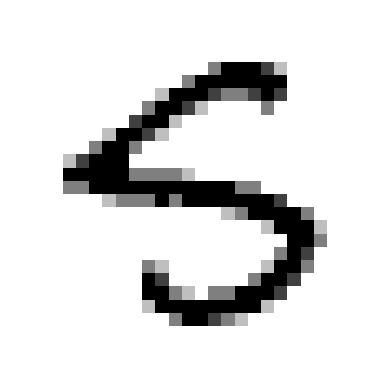

In [6]:
show_img(X_train[3500])

Now, we use OneVsOneClassifier with a KNeighbborsClassifier (k = 7)

In [7]:
ovo_clf = OneVsOneClassifier(KNeighborsClassifier(n_neighbors=7, algorithm='kd_tree'))
ovo_clf.fit(X_train, y_train)

OneVsOneClassifier(estimator=KNeighborsClassifier(algorithm='kd_tree',
                                                  n_neighbors=7))

It is possible to access the 45 estimators through the estimators_ attribute and the decision scores for each class through the decision_function method.

In [8]:
print(ovo_clf.decision_function(X_test[:5]))
print(ovo_clf.predict(X_test[:5]))

[[ 7.78333333 -0.29239766  9.22222222  7.15384615  3.76388889  1.77777778
   0.83333333  6.27350427  5.27192982  3.24      ]
 [-0.3         7.84615385  9.22222222  6.87878788  4.95833333  1.9
   0.77777778  6.26041667  3.25        4.27192982]
 [ 6.77272727  1.7173913   3.74193548 -0.27642276  8.23188406  5.1875
   9.28571429  0.84615385  3.21052632  6.2826087 ]
 [ 1.70491803 -0.29310345  2.74193548  4.8125      7.21666667  6.19607843
   0.77777778  9.29166667  4.25806452  8.2962963 ]
 [ 0.70909091 -0.28666667  4.76        9.25        3.7962963   7.24
   1.7962963   3.12121212  8.29090909  6.28368794]]
[2 2 6 7 3]


Take first array: the highest score is 9.22(2) which corresponds to number 2.
7 is the most difficult number to distinguish.

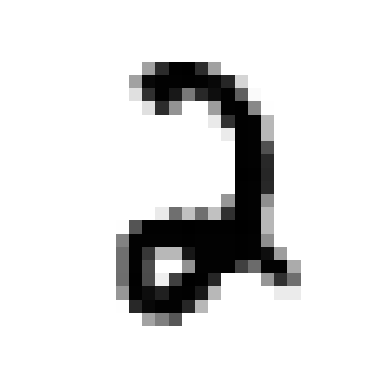

In [9]:
show_img(X_test[0])

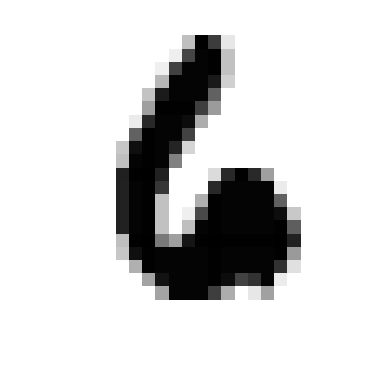

In [11]:
show_img(X_test[2])

As usual, we can use CVto evaluate the performance. Here we use LogisticRegression for performance issues.

In [13]:
pipe_clf = Pipeline([
    ('scaling', StandardScaler()),
    ('classifier', LogisticRegression())
])

ovo_clf = OneVsOneClassifier(pipe_clf)
scores = cross_val_score(ovo_clf, X_train, y_train, scoring='accuracy', cv=3, n_jobs=-1, verbose=3) # cv = 3: split set into three subsets; 
print(scores)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer 

[0.92634994 0.92536582 0.92487602]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   30.9s finished


## Error Analysis

Error analysis is the way to identify weak points in the algorithm to improve it.

We try now to analiaze the confusion matrix for a multiclass classification problem. In this case, we have to inspect a C x C matrix.

In [14]:
pipe_clf = Pipeline([
    ('scaling', StandardScaler()),
    ('classifier', LogisticRegression())
])

y_train_predicted = cross_val_predict(pipe_clf, X_train, y_train, cv=3)
confusion_matrix = confusion_matrix(y_train, y_train_predicted)

/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

[CV] END ................................ score: (test=0.925) total time=  30.9s
[CV] END ................................ score: (test=0.925) total time=  29.2s
[CV] END ................................ score: (test=0.925) total time=  30.5s
[CV] END ................................ score: (test=0.925) total time=  29.3s
[CV] END ................................ score: (test=0.926) total time=  29.0s


/Users/aleksandrak/Desktop/ML-course-Labs/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
confusion_matrix.shape

(10, 10)

We can plot the confusion matrix using the Matplotlib method matshow, but before that we divide each value by the number of images in the corresponding class. This way we get the error rates of each class and it's easier to highlight the most problematic cases for the model.

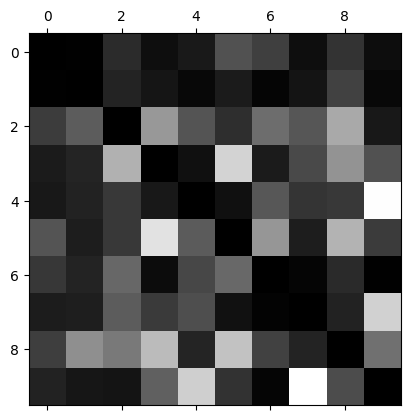

In [18]:
row_sums = confusion_matrix.sum(axis=1, keepdims=1)
norm_conf_matrix = confusion_matrix / row_sums
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=mlp.cm.gray)

On the diagonal we have the true label.

Here the digit 3 is more likely misclassified as the digit 5 while the digit 4 is most likely misclassified as 9. The same happens with digit 7, while misclasification errors involving the digit 8 are referred to digit 5.

It's good, but not ready for the production.